<a href="https://colab.research.google.com/github/mnzatha/Pemograman-Pyhton-Image-Classsification/blob/main/Tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Tugas11

/content/drive/MyDrive/Tugas11


In [66]:
ls

daun/  nnmodel_scene/


In [70]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [49]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("daun")
data = []
labels = []

[INFO] loading images...


In [50]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((192, 192))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [51]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [52]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [53]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [54]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 192, 192, 3)
(146, 192, 192, 3)


In [58]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(192,192,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 188, 188, 16)      1216      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 92, 92, 16)        2320      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 20, 20, 32)       

In [59]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [60]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 14s 964ms/step - loss: 1.6133 - accuracy: 0.2489 - val_loss: 1.5895 - val_accuracy: 0.3356
Epoch 2/25
14/14 [==============================] - 13s 956ms/step - loss: 1.5367 - accuracy: 0.3219 - val_loss: 1.3940 - val_accuracy: 0.3973
Epoch 3/25
14/14 [==============================] - 13s 961ms/step - loss: 1.3429 - accuracy: 0.4018 - val_loss: 1.1686 - val_accuracy: 0.5411
Epoch 4/25
14/14 [==============================] - 16s 1s/step - loss: 1.1606 - accuracy: 0.5320 - val_loss: 1.1110 - val_accuracy: 0.5205
Epoch 5/25
14/14 [==============================] - 13s 962ms/step - loss: 1.0343 - accuracy: 0.5959 - val_loss: 0.9207 - val_accuracy: 0.6575
Epoch 6/25
14/14 [==============================] - 14s 965ms/step - loss: 0.8606 - accuracy: 0.6507 - val_loss: 0.8461 - val_accuracy: 0.6918
Epoch 7/25
14/14 [==============================] - 14s 965ms/step - loss: 0.8034 - accuracy: 0.6941 - val_loss: 0.8934 - val_accuracy: 0.5959
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


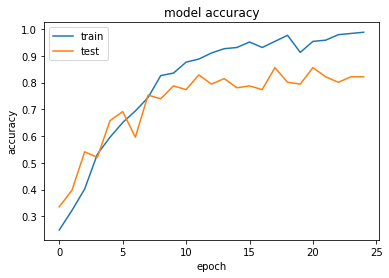

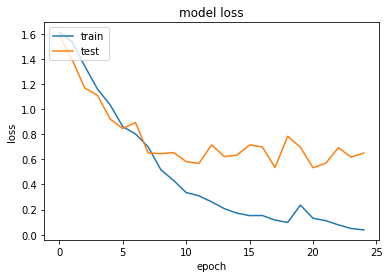

In [61]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.79      0.60      0.68        25
      GMB_02       0.68      0.79      0.73        24
      GMB_03       1.00      0.86      0.92        35
      GMB_04       0.92      0.82      0.87        28
      GMB_05       0.75      0.97      0.85        34

    accuracy                           0.82       146
   macro avg       0.83      0.81      0.81       146
weighted avg       0.84      0.82      0.82       146



In [72]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [75]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200917_134228.jpg'

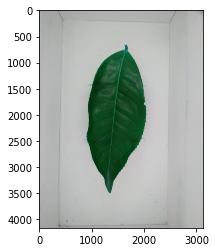

In [76]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [78]:
image_testing = Image.open('IMG_20200917_134228.jpg')
image_testing = np.array(image_testing.resize((192, 192))) / 255.0
image_testing.shape

(192, 192, 3)

In [79]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 192, 192, 3)


In [81]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.1453760e-05 9.9892384e-01 1.0187554e-03 4.5840607e-05 6.3474772e-08]]
['GMB_02']
